In [27]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
tf.logging.set_verbosity(tf.logging.ERROR)
keras.__version__

'2.2.4'

batch size & iterations & epoch
- 2000 data
- 500 batches
- 4 iteration
- 1 epoch

# MNIST 연습문제

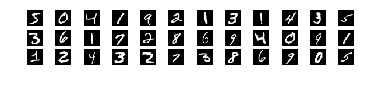

In [21]:
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

plt.figure(figsize=(6, 1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i], cmap='gray')
    plt.axis('off')
plt.show()

### 1. 이미지 전처리

- scaling

In [29]:
print(X_train0.shape, X_train0.dtype)
print(X_train0[0].shape)

(60000, 28, 28) uint8
(28, 28)


In [30]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


- One hot encoding

In [32]:
y_train0

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### 2. 신경망 구현

In [41]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)
model = Sequential()
model.add(Dense(15, input_dim=784, activation='relu'))
model.add(Dense(10, activation='relu'))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=['accuracy'])

### 3. model display

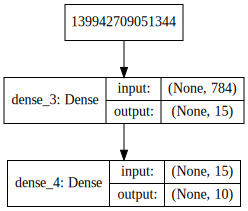

In [40]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [50]:
l1 = model.layers[0]
l2 = model.layers[1]

print(l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params())
print(l2.name, type(l2), l2.output_shape, l2.activation.__name__, l2.count_params())

dense_5 <class 'keras.layers.core.Dense'> (None, 15) relu 11775
dense_6 <class 'keras.layers.core.Dense'> (None, 10) relu 160


### 4. training

In [51]:
%%time
hist = model.fit(X_train, Y_train, epochs=10, batch_size=100,\
                validation_data=(X_test, Y_test),
                verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.0389 - acc: 0.7804 - val_loss: 0.0252 - val_acc: 0.8848
Epoch 2/10
 - 2s - loss: 0.0235 - acc: 0.8907 - val_loss: 0.0212 - val_acc: 0.9036
Epoch 3/10
 - 1s - loss: 0.0208 - acc: 0.9044 - val_loss: 0.0195 - val_acc: 0.9107
Epoch 4/10
 - 1s - loss: 0.0194 - acc: 0.9102 - val_loss: 0.0184 - val_acc: 0.9162
Epoch 5/10
 - 1s - loss: 0.0185 - acc: 0.9143 - val_loss: 0.0179 - val_acc: 0.9196
Epoch 6/10
 - 1s - loss: 0.0178 - acc: 0.9186 - val_loss: 0.0174 - val_acc: 0.9210
Epoch 7/10
 - 1s - loss: 0.0172 - acc: 0.9215 - val_loss: 0.0168 - val_acc: 0.9249
Epoch 8/10
 - 1s - loss: 0.0167 - acc: 0.9231 - val_loss: 0.0164 - val_acc: 0.9254
Epoch 9/10
 - 1s - loss: 0.0164 - acc: 0.9254 - val_loss: 0.0162 - val_acc: 0.9273
Epoch 10/10
 - 1s - loss: 0.0160 - acc: 0.9271 - val_loss: 0.0159 - val_acc: 0.9278
CPU times: user 22.9 s, sys: 1.47 s, total: 24.4 s
Wall time: 14.8 s


### 5. performance graph

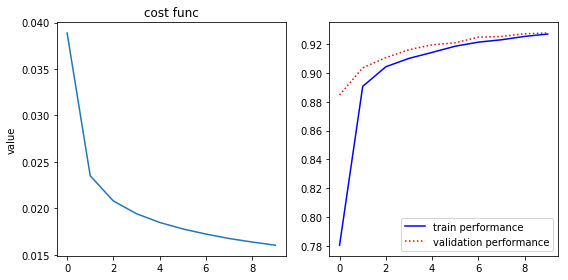

In [53]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.plot(hist.history['loss'])
plt.title('cost func')
plt.ylabel('value')

plt.subplot(122)
plt.plot(hist.history['acc'], 'b-', label='train performance')
plt.plot(hist.history['val_acc'], 'r:', label='validation performance')
plt.legend()
plt.tight_layout()
plt.show()


### 6. 가중치 정보

In [54]:
# 첫번째 레이어
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((784, 15), (15,))

In [55]:
w2 = l2.get_weights()
w2[0].shape, w2[1].shape

((15, 10), (10,))

### 7. prediction
- care for inputdata shape: (n, R) not (R, )

In [64]:
X_test[:1, :].shape

(1, 784)

In [65]:
X_test[0].shape

(784,)

In [86]:
X_test.shape

(10000, 784)

In [104]:
model.predict(X_test[np.newaxis, 0], verbose=0)

array([[0.        , 0.        , 0.        , 0.08819881, 0.        ,
        0.        , 0.        , 0.8159505 , 0.        , 0.        ]],
      dtype=float32)

In [107]:
model.predict_classes(X_test[:2], verbose=0)

array([7, 2])

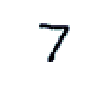

In [110]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()

### 8. 모형 저장
- `save`
- type: hdf5

In [116]:
model.save('model1.hdf5')
del model

In [117]:
from keras.models import load_model

model = load_model('model1.hdf5')
model.predict_classes(X_test[:2])

array([7, 2])

# iris 연습문제

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

iris = load_iris()
X_data = iris.data
y_data = iris.target

X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=0) 

Y_train = np_utils.to_categorical(y_train, 3)
Y_test = np_utils.to_categorical(y_test, 3)

### create model

In [71]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(99)
model = Sequential()
# hidden layer
model.add(Dense(15, input_dim=4, activation="sigmoid"))
# output layer
model.add(Dense(3, activation="sigmoid"))


model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

### validation (1) hist

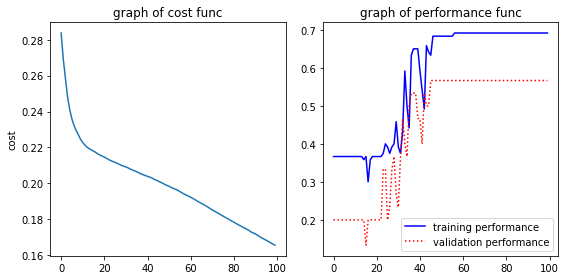

In [70]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title('graph of cost func')
plt.plot(hist.history['loss'])
plt.ylabel('cost')

plt.subplot(122)
plt.title('graph of performance func')
plt.plot(hist.history['acc'], 'b-', label='training performance')
plt.plot(hist.history['val_acc'], 'r:', label='validation performance')
plt.legend()

plt.tight_layout()
plt.show()

In [75]:
from sklearn.model_selection import train_test_split

hist = model.fit(X_train, Y_train,
                 epochs=200, batch_size=100,
                 validation_data=(X_test, Y_test),
                 verbose=2)

Train on 120 samples, validate on 30 samples
Epoch 1/200
 - 0s - loss: 0.1127 - acc: 0.7250 - val_loss: 0.1202 - val_acc: 0.5667
Epoch 2/200
 - 0s - loss: 0.1126 - acc: 0.7083 - val_loss: 0.1206 - val_acc: 0.5667
Epoch 3/200
 - 0s - loss: 0.1125 - acc: 0.7083 - val_loss: 0.1204 - val_acc: 0.5667
Epoch 4/200
 - 0s - loss: 0.1124 - acc: 0.7083 - val_loss: 0.1210 - val_acc: 0.5667
Epoch 5/200
 - 0s - loss: 0.1123 - acc: 0.7083 - val_loss: 0.1218 - val_acc: 0.5667
Epoch 6/200
 - 0s - loss: 0.1123 - acc: 0.6917 - val_loss: 0.1223 - val_acc: 0.5667
Epoch 7/200
 - 0s - loss: 0.1122 - acc: 0.6917 - val_loss: 0.1221 - val_acc: 0.5667
Epoch 8/200
 - 0s - loss: 0.1121 - acc: 0.6917 - val_loss: 0.1223 - val_acc: 0.5667
Epoch 9/200
 - 0s - loss: 0.1120 - acc: 0.6917 - val_loss: 0.1217 - val_acc: 0.5667
Epoch 10/200
 - 0s - loss: 0.1119 - acc: 0.6917 - val_loss: 0.1219 - val_acc: 0.5667
Epoch 11/200
 - 0s - loss: 0.1119 - acc: 0.6917 - val_loss: 0.1219 - val_acc: 0.5667
Epoch 12/200
 - 0s - loss: 0.

Epoch 97/200
 - 0s - loss: 0.1051 - acc: 0.7250 - val_loss: 0.1141 - val_acc: 0.6000
Epoch 98/200
 - 0s - loss: 0.1050 - acc: 0.7333 - val_loss: 0.1144 - val_acc: 0.6000
Epoch 99/200
 - 0s - loss: 0.1049 - acc: 0.7250 - val_loss: 0.1147 - val_acc: 0.6000
Epoch 100/200
 - 0s - loss: 0.1048 - acc: 0.7250 - val_loss: 0.1136 - val_acc: 0.6333
Epoch 101/200
 - 0s - loss: 0.1048 - acc: 0.7417 - val_loss: 0.1127 - val_acc: 0.6333
Epoch 102/200
 - 0s - loss: 0.1047 - acc: 0.7583 - val_loss: 0.1122 - val_acc: 0.6333
Epoch 103/200
 - 0s - loss: 0.1046 - acc: 0.7583 - val_loss: 0.1117 - val_acc: 0.6333
Epoch 104/200
 - 0s - loss: 0.1045 - acc: 0.7833 - val_loss: 0.1130 - val_acc: 0.6333
Epoch 105/200
 - 0s - loss: 0.1044 - acc: 0.7500 - val_loss: 0.1136 - val_acc: 0.6000
Epoch 106/200
 - 0s - loss: 0.1043 - acc: 0.7333 - val_loss: 0.1130 - val_acc: 0.6333
Epoch 107/200
 - 0s - loss: 0.1043 - acc: 0.7417 - val_loss: 0.1117 - val_acc: 0.6333
Epoch 108/200
 - 0s - loss: 0.1042 - acc: 0.7667 - val_lo

Epoch 193/200
 - 0s - loss: 0.0978 - acc: 0.8667 - val_loss: 0.1042 - val_acc: 0.7333
Epoch 194/200
 - 0s - loss: 0.0977 - acc: 0.8667 - val_loss: 0.1051 - val_acc: 0.7333
Epoch 195/200
 - 0s - loss: 0.0976 - acc: 0.8583 - val_loss: 0.1040 - val_acc: 0.7667
Epoch 196/200
 - 0s - loss: 0.0975 - acc: 0.8667 - val_loss: 0.1037 - val_acc: 0.7667
Epoch 197/200
 - 0s - loss: 0.0975 - acc: 0.8667 - val_loss: 0.1049 - val_acc: 0.7333
Epoch 198/200
 - 0s - loss: 0.0975 - acc: 0.8583 - val_loss: 0.1065 - val_acc: 0.7000
Epoch 199/200
 - 0s - loss: 0.0975 - acc: 0.8250 - val_loss: 0.1064 - val_acc: 0.7000
Epoch 200/200
 - 0s - loss: 0.0974 - acc: 0.8250 - val_loss: 0.1055 - val_acc: 0.7333


### validation (2) KerasClassifier
- sklearn느림

In [15]:
def baseline_model():
    np.random.seed(0)
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation="sigmoid"))
    model.add(Dense(3, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])
    return model

In [27]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

y = iris.target
dummy_y = np_utils.to_categorical(y)

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, shuffle=True, random_state=90)
result = cross_val_score(estimator, X_data, dummy_y, cv=kfold)

In [49]:
print("Baseline: {:.2f} (std: {:.2f})".format(result.mean(), result.std()))

Baseline: 0.97 (std: 0.03)


# Olivetti face 연습문제

In [2]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces(shuffle=True, random_state=99)

### 1. 이미지 전처리

In [123]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

faces = dataset.data
label = dataset.target
y_ohe = np_utils.to_categorical(label)
X_train, X_test, y_train, y_test = train_test_split(faces, y_ohe, test_size=0.2,random_state=0) 

In [155]:
np.random.seed(0)
model = Sequential()
# hidden layer
model.add(Dense(150, input_dim=4096, activation="relu"))
# output layer
model.add(Dense(40, activation="relu"))
model.compile(optimizer=SGD(lr=0.00002), loss='mean_squared_error', metrics=["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 150)               614550    
_________________________________________________________________
dense_25 (Dense)             (None, 40)                6040      
Total params: 620,590
Trainable params: 620,590
Non-trainable params: 0
_________________________________________________________________


In [153]:
hist = model.fit(X_train, y_train,
                 epochs=1000000, batch_size=100,
                 validation_data=(X_test, y_test),
                 verbose=2)

Train on 320 samples, validate on 80 samples
Epoch 1/1000000
 - 0s - loss: 0.1872 - acc: 0.0125 - val_loss: 0.1186 - val_acc: 0.0000e+00
Epoch 2/1000000
 - 0s - loss: 0.1039 - acc: 0.0000e+00 - val_loss: 0.0774 - val_acc: 0.0000e+00
Epoch 3/1000000
 - 0s - loss: 0.0702 - acc: 0.0125 - val_loss: 0.0582 - val_acc: 0.0000e+00
Epoch 4/1000000
 - 0s - loss: 0.0539 - acc: 0.0156 - val_loss: 0.0477 - val_acc: 0.0125
Epoch 5/1000000
 - 0s - loss: 0.0450 - acc: 0.0250 - val_loss: 0.0415 - val_acc: 0.0125
Epoch 6/1000000
 - 0s - loss: 0.0396 - acc: 0.0250 - val_loss: 0.0374 - val_acc: 0.0125
Epoch 7/1000000
 - 0s - loss: 0.0360 - acc: 0.0344 - val_loss: 0.0347 - val_acc: 0.0250
Epoch 8/1000000
 - 0s - loss: 0.0336 - acc: 0.0312 - val_loss: 0.0328 - val_acc: 0.0250
Epoch 9/1000000
 - 0s - loss: 0.0319 - acc: 0.0281 - val_loss: 0.0314 - val_acc: 0.0375
Epoch 10/1000000
 - 0s - loss: 0.0307 - acc: 0.0281 - val_loss: 0.0304 - val_acc: 0.0375
Epoch 11/1000000
 - 0s - loss: 0.0298 - acc: 0.0281 - val_

Epoch 93/1000000
 - 0s - loss: 0.0250 - acc: 0.0500 - val_loss: 0.0252 - val_acc: 0.0500
Epoch 94/1000000
 - 0s - loss: 0.0250 - acc: 0.0500 - val_loss: 0.0252 - val_acc: 0.0375
Epoch 95/1000000
 - 0s - loss: 0.0250 - acc: 0.0500 - val_loss: 0.0252 - val_acc: 0.0500
Epoch 96/1000000
 - 0s - loss: 0.0250 - acc: 0.0531 - val_loss: 0.0252 - val_acc: 0.0500
Epoch 97/1000000
 - 0s - loss: 0.0250 - acc: 0.0531 - val_loss: 0.0252 - val_acc: 0.0500
Epoch 98/1000000
 - 0s - loss: 0.0250 - acc: 0.0500 - val_loss: 0.0252 - val_acc: 0.0500
Epoch 99/1000000
 - 0s - loss: 0.0250 - acc: 0.0531 - val_loss: 0.0252 - val_acc: 0.0500
Epoch 100/1000000
 - 0s - loss: 0.0250 - acc: 0.0531 - val_loss: 0.0252 - val_acc: 0.0500
Epoch 101/1000000
 - 0s - loss: 0.0250 - acc: 0.0500 - val_loss: 0.0252 - val_acc: 0.0500
Epoch 102/1000000
 - 0s - loss: 0.0250 - acc: 0.0531 - val_loss: 0.0252 - val_acc: 0.0500
Epoch 103/1000000
 - 0s - loss: 0.0250 - acc: 0.0531 - val_loss: 0.0251 - val_acc: 0.0500
Epoch 104/1000000

 - 0s - loss: 0.0247 - acc: 0.0937 - val_loss: 0.0250 - val_acc: 0.0500
Epoch 185/1000000
 - 0s - loss: 0.0247 - acc: 0.0937 - val_loss: 0.0250 - val_acc: 0.0625
Epoch 186/1000000
 - 0s - loss: 0.0247 - acc: 0.0938 - val_loss: 0.0250 - val_acc: 0.0750
Epoch 187/1000000
 - 0s - loss: 0.0247 - acc: 0.0938 - val_loss: 0.0250 - val_acc: 0.0750
Epoch 188/1000000
 - 0s - loss: 0.0247 - acc: 0.0937 - val_loss: 0.0250 - val_acc: 0.0750
Epoch 189/1000000
 - 0s - loss: 0.0247 - acc: 0.0937 - val_loss: 0.0250 - val_acc: 0.0750
Epoch 190/1000000
 - 0s - loss: 0.0247 - acc: 0.0938 - val_loss: 0.0250 - val_acc: 0.0750
Epoch 191/1000000
 - 0s - loss: 0.0247 - acc: 0.0938 - val_loss: 0.0250 - val_acc: 0.0750
Epoch 192/1000000
 - 0s - loss: 0.0247 - acc: 0.0937 - val_loss: 0.0250 - val_acc: 0.0750
Epoch 193/1000000
 - 0s - loss: 0.0247 - acc: 0.0969 - val_loss: 0.0250 - val_acc: 0.0750
Epoch 194/1000000
 - 0s - loss: 0.0247 - acc: 0.0937 - val_loss: 0.0250 - val_acc: 0.0750
Epoch 195/1000000
 - 0s - lo

Epoch 276/1000000
 - 0s - loss: 0.0245 - acc: 0.1125 - val_loss: 0.0248 - val_acc: 0.0875
Epoch 277/1000000
 - 0s - loss: 0.0245 - acc: 0.1094 - val_loss: 0.0248 - val_acc: 0.0875
Epoch 278/1000000
 - 0s - loss: 0.0245 - acc: 0.1094 - val_loss: 0.0249 - val_acc: 0.0875
Epoch 279/1000000
 - 0s - loss: 0.0245 - acc: 0.1125 - val_loss: 0.0249 - val_acc: 0.0875
Epoch 280/1000000
 - 0s - loss: 0.0245 - acc: 0.1125 - val_loss: 0.0249 - val_acc: 0.0875
Epoch 281/1000000
 - 0s - loss: 0.0245 - acc: 0.1156 - val_loss: 0.0249 - val_acc: 0.0875
Epoch 282/1000000
 - 0s - loss: 0.0244 - acc: 0.1156 - val_loss: 0.0249 - val_acc: 0.0875
Epoch 283/1000000
 - 0s - loss: 0.0244 - acc: 0.1156 - val_loss: 0.0248 - val_acc: 0.0875
Epoch 284/1000000
 - 0s - loss: 0.0244 - acc: 0.1125 - val_loss: 0.0248 - val_acc: 0.0875
Epoch 285/1000000
 - 0s - loss: 0.0244 - acc: 0.1125 - val_loss: 0.0248 - val_acc: 0.0875
Epoch 286/1000000
 - 0s - loss: 0.0244 - acc: 0.1125 - val_loss: 0.0248 - val_acc: 0.0875
Epoch 287/

 - 0s - loss: 0.0243 - acc: 0.1219 - val_loss: 0.0248 - val_acc: 0.1000
Epoch 368/1000000
 - 0s - loss: 0.0243 - acc: 0.1250 - val_loss: 0.0248 - val_acc: 0.1000
Epoch 369/1000000
 - 0s - loss: 0.0243 - acc: 0.1219 - val_loss: 0.0248 - val_acc: 0.1000
Epoch 370/1000000
 - 0s - loss: 0.0243 - acc: 0.1219 - val_loss: 0.0248 - val_acc: 0.1000
Epoch 371/1000000
 - 0s - loss: 0.0243 - acc: 0.1219 - val_loss: 0.0248 - val_acc: 0.1000
Epoch 372/1000000
 - 0s - loss: 0.0243 - acc: 0.1219 - val_loss: 0.0247 - val_acc: 0.1000
Epoch 373/1000000
 - 0s - loss: 0.0243 - acc: 0.1187 - val_loss: 0.0247 - val_acc: 0.1000
Epoch 374/1000000
 - 0s - loss: 0.0243 - acc: 0.1219 - val_loss: 0.0247 - val_acc: 0.1000
Epoch 375/1000000
 - 0s - loss: 0.0243 - acc: 0.1250 - val_loss: 0.0247 - val_acc: 0.1000
Epoch 376/1000000
 - 0s - loss: 0.0243 - acc: 0.1250 - val_loss: 0.0247 - val_acc: 0.1000
Epoch 377/1000000
 - 0s - loss: 0.0243 - acc: 0.1219 - val_loss: 0.0247 - val_acc: 0.1000
Epoch 378/1000000
 - 0s - lo

Epoch 459/1000000
 - 0s - loss: 0.0242 - acc: 0.1313 - val_loss: 0.0247 - val_acc: 0.1125
Epoch 460/1000000
 - 0s - loss: 0.0242 - acc: 0.1312 - val_loss: 0.0247 - val_acc: 0.1125
Epoch 461/1000000
 - 0s - loss: 0.0242 - acc: 0.1312 - val_loss: 0.0247 - val_acc: 0.0875
Epoch 462/1000000
 - 0s - loss: 0.0242 - acc: 0.1312 - val_loss: 0.0247 - val_acc: 0.0875
Epoch 463/1000000
 - 0s - loss: 0.0242 - acc: 0.1312 - val_loss: 0.0247 - val_acc: 0.1000
Epoch 464/1000000
 - 0s - loss: 0.0242 - acc: 0.1313 - val_loss: 0.0247 - val_acc: 0.1000
Epoch 465/1000000
 - 0s - loss: 0.0242 - acc: 0.1312 - val_loss: 0.0247 - val_acc: 0.1000
Epoch 466/1000000
 - 0s - loss: 0.0242 - acc: 0.1281 - val_loss: 0.0247 - val_acc: 0.1000
Epoch 467/1000000
 - 0s - loss: 0.0242 - acc: 0.1312 - val_loss: 0.0247 - val_acc: 0.1000
Epoch 468/1000000
 - 0s - loss: 0.0242 - acc: 0.1312 - val_loss: 0.0247 - val_acc: 0.1000
Epoch 469/1000000
 - 0s - loss: 0.0242 - acc: 0.1281 - val_loss: 0.0247 - val_acc: 0.1000
Epoch 470/

 - 0s - loss: 0.0241 - acc: 0.1281 - val_loss: 0.0246 - val_acc: 0.1250
Epoch 551/1000000
 - 0s - loss: 0.0241 - acc: 0.1281 - val_loss: 0.0246 - val_acc: 0.1250
Epoch 552/1000000
 - 0s - loss: 0.0241 - acc: 0.1281 - val_loss: 0.0246 - val_acc: 0.1250
Epoch 553/1000000
 - 0s - loss: 0.0241 - acc: 0.1281 - val_loss: 0.0246 - val_acc: 0.1250
Epoch 554/1000000
 - 0s - loss: 0.0241 - acc: 0.1281 - val_loss: 0.0246 - val_acc: 0.1250
Epoch 555/1000000
 - 0s - loss: 0.0241 - acc: 0.1312 - val_loss: 0.0246 - val_acc: 0.1250
Epoch 556/1000000
 - 0s - loss: 0.0241 - acc: 0.1312 - val_loss: 0.0246 - val_acc: 0.1250
Epoch 557/1000000
 - 0s - loss: 0.0241 - acc: 0.1312 - val_loss: 0.0246 - val_acc: 0.1250
Epoch 558/1000000
 - 0s - loss: 0.0241 - acc: 0.1312 - val_loss: 0.0245 - val_acc: 0.1250
Epoch 559/1000000
 - 0s - loss: 0.0241 - acc: 0.1312 - val_loss: 0.0246 - val_acc: 0.1250
Epoch 560/1000000
 - 0s - loss: 0.0241 - acc: 0.1344 - val_loss: 0.0246 - val_acc: 0.1250
Epoch 561/1000000
 - 0s - lo

Epoch 642/1000000
 - 0s - loss: 0.0240 - acc: 0.1375 - val_loss: 0.0245 - val_acc: 0.1250
Epoch 643/1000000
 - 0s - loss: 0.0240 - acc: 0.1375 - val_loss: 0.0245 - val_acc: 0.1250
Epoch 644/1000000
 - 0s - loss: 0.0240 - acc: 0.1375 - val_loss: 0.0245 - val_acc: 0.1250
Epoch 645/1000000
 - 0s - loss: 0.0240 - acc: 0.1375 - val_loss: 0.0245 - val_acc: 0.1250
Epoch 646/1000000
 - 0s - loss: 0.0240 - acc: 0.1375 - val_loss: 0.0245 - val_acc: 0.1125
Epoch 647/1000000
 - 0s - loss: 0.0240 - acc: 0.1344 - val_loss: 0.0245 - val_acc: 0.1250
Epoch 648/1000000
 - 0s - loss: 0.0240 - acc: 0.1313 - val_loss: 0.0245 - val_acc: 0.1250
Epoch 649/1000000
 - 0s - loss: 0.0240 - acc: 0.1344 - val_loss: 0.0245 - val_acc: 0.1250
Epoch 650/1000000
 - 0s - loss: 0.0240 - acc: 0.1344 - val_loss: 0.0245 - val_acc: 0.1250
Epoch 651/1000000
 - 0s - loss: 0.0240 - acc: 0.1375 - val_loss: 0.0245 - val_acc: 0.1250
Epoch 652/1000000
 - 0s - loss: 0.0240 - acc: 0.1375 - val_loss: 0.0245 - val_acc: 0.1250
Epoch 653/

 - 0s - loss: 0.0239 - acc: 0.1406 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 734/1000000
 - 0s - loss: 0.0239 - acc: 0.1406 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 735/1000000
 - 0s - loss: 0.0239 - acc: 0.1406 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 736/1000000
 - 0s - loss: 0.0239 - acc: 0.1406 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 737/1000000
 - 0s - loss: 0.0239 - acc: 0.1406 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 738/1000000
 - 0s - loss: 0.0239 - acc: 0.1406 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 739/1000000
 - 0s - loss: 0.0239 - acc: 0.1406 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 740/1000000
 - 0s - loss: 0.0239 - acc: 0.1406 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 741/1000000
 - 0s - loss: 0.0239 - acc: 0.1406 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 742/1000000
 - 0s - loss: 0.0239 - acc: 0.1406 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 743/1000000
 - 0s - loss: 0.0239 - acc: 0.1406 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 744/1000000
 - 0s - lo

Epoch 825/1000000
 - 0s - loss: 0.0238 - acc: 0.1438 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 826/1000000
 - 0s - loss: 0.0238 - acc: 0.1438 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 827/1000000
 - 0s - loss: 0.0238 - acc: 0.1438 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 828/1000000
 - 0s - loss: 0.0238 - acc: 0.1438 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 829/1000000
 - 0s - loss: 0.0238 - acc: 0.1437 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 830/1000000
 - 0s - loss: 0.0238 - acc: 0.1438 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 831/1000000
 - 0s - loss: 0.0238 - acc: 0.1438 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 832/1000000
 - 0s - loss: 0.0238 - acc: 0.1438 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 833/1000000
 - 0s - loss: 0.0238 - acc: 0.1438 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 834/1000000
 - 0s - loss: 0.0238 - acc: 0.1438 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 835/1000000
 - 0s - loss: 0.0238 - acc: 0.1438 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 836/

 - 0s - loss: 0.0237 - acc: 0.1406 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 917/1000000
 - 0s - loss: 0.0237 - acc: 0.1438 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 918/1000000
 - 0s - loss: 0.0237 - acc: 0.1438 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 919/1000000
 - 0s - loss: 0.0237 - acc: 0.1438 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 920/1000000
 - 0s - loss: 0.0237 - acc: 0.1438 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 921/1000000
 - 0s - loss: 0.0237 - acc: 0.1438 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 922/1000000
 - 0s - loss: 0.0237 - acc: 0.1438 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 923/1000000
 - 0s - loss: 0.0237 - acc: 0.1438 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 924/1000000
 - 0s - loss: 0.0237 - acc: 0.1437 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 925/1000000
 - 0s - loss: 0.0237 - acc: 0.1437 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 926/1000000
 - 0s - loss: 0.0237 - acc: 0.1437 - val_loss: 0.0244 - val_acc: 0.1250
Epoch 927/1000000
 - 0s - lo

 - 0s - loss: 0.0237 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1008/1000000
 - 0s - loss: 0.0237 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 1009/1000000
 - 0s - loss: 0.0237 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 1010/1000000
 - 0s - loss: 0.0237 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 1011/1000000
 - 0s - loss: 0.0237 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 1012/1000000
 - 0s - loss: 0.0237 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 1013/1000000
 - 0s - loss: 0.0237 - acc: 0.1438 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 1014/1000000
 - 0s - loss: 0.0237 - acc: 0.1438 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 1015/1000000
 - 0s - loss: 0.0237 - acc: 0.1437 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1016/1000000
 - 0s - loss: 0.0237 - acc: 0.1438 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1017/1000000
 - 0s - loss: 0.0237 - acc: 0.1438 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1018/1000000

Epoch 1098/1000000
 - 0s - loss: 0.0236 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1099/1000000
 - 0s - loss: 0.0236 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1100/1000000
 - 0s - loss: 0.0236 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1101/1000000
 - 0s - loss: 0.0236 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1102/1000000
 - 0s - loss: 0.0236 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1103/1000000
 - 0s - loss: 0.0236 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1104/1000000
 - 0s - loss: 0.0236 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1105/1000000
 - 0s - loss: 0.0236 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1106/1000000
 - 0s - loss: 0.0236 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1107/1000000
 - 0s - loss: 0.0236 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1108/1000000
 - 0s - loss: 0.0236 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375

 - 0s - loss: 0.0235 - acc: 0.1500 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1189/1000000
 - 0s - loss: 0.0235 - acc: 0.1500 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1190/1000000
 - 0s - loss: 0.0235 - acc: 0.1500 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 1191/1000000
 - 0s - loss: 0.0235 - acc: 0.1500 - val_loss: 0.0243 - val_acc: 0.1250
Epoch 1192/1000000
 - 0s - loss: 0.0235 - acc: 0.1500 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1193/1000000
 - 0s - loss: 0.0235 - acc: 0.1500 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1194/1000000
 - 0s - loss: 0.0235 - acc: 0.1469 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1195/1000000
 - 0s - loss: 0.0235 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1196/1000000
 - 0s - loss: 0.0235 - acc: 0.1469 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1197/1000000
 - 0s - loss: 0.0235 - acc: 0.1500 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1198/1000000
 - 0s - loss: 0.0235 - acc: 0.1437 - val_loss: 0.0243 - val_acc: 0.1375
Epoch 1199/1000000

Epoch 1279/1000000
 - 0s - loss: 0.0235 - acc: 0.1469 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1280/1000000
 - 0s - loss: 0.0235 - acc: 0.1438 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1281/1000000
 - 0s - loss: 0.0235 - acc: 0.1469 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1282/1000000
 - 0s - loss: 0.0235 - acc: 0.1469 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1283/1000000
 - 0s - loss: 0.0235 - acc: 0.1469 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1284/1000000
 - 0s - loss: 0.0235 - acc: 0.1437 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1285/1000000
 - 0s - loss: 0.0235 - acc: 0.1438 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1286/1000000
 - 0s - loss: 0.0235 - acc: 0.1469 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1287/1000000
 - 0s - loss: 0.0235 - acc: 0.1469 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1288/1000000
 - 0s - loss: 0.0235 - acc: 0.1469 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1289/1000000
 - 0s - loss: 0.0235 - acc: 0.1469 - val_loss: 0.0242 - val_acc: 0.1375

 - 0s - loss: 0.0234 - acc: 0.1437 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1370/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1371/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1372/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1373/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1374/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1375/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1376/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1377/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1378/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1379/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0242 - val_acc: 0.1375
Epoch 1380/1000000

Epoch 1460/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1250
Epoch 1461/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1250
Epoch 1462/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1250
Epoch 1463/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1250
Epoch 1464/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1250
Epoch 1465/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1250
Epoch 1466/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1250
Epoch 1467/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1250
Epoch 1468/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1469/1000000
 - 0s - loss: 0.0234 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1470/1000000
 - 0s - loss: 0.0233 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1375

 - 0s - loss: 0.0233 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1551/1000000
 - 0s - loss: 0.0233 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1552/1000000
 - 0s - loss: 0.0233 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1553/1000000
 - 0s - loss: 0.0233 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1554/1000000
 - 0s - loss: 0.0233 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1555/1000000
 - 0s - loss: 0.0233 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1556/1000000
 - 0s - loss: 0.0233 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1557/1000000
 - 0s - loss: 0.0233 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1558/1000000
 - 0s - loss: 0.0233 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1559/1000000
 - 0s - loss: 0.0233 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1560/1000000
 - 0s - loss: 0.0233 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1561/1000000

Epoch 1641/1000000
 - 0s - loss: 0.0233 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1642/1000000
 - 0s - loss: 0.0233 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1643/1000000
 - 0s - loss: 0.0233 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1644/1000000
 - 0s - loss: 0.0233 - acc: 0.1500 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1645/1000000
 - 0s - loss: 0.0233 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1646/1000000
 - 0s - loss: 0.0233 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1647/1000000
 - 0s - loss: 0.0233 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1648/1000000
 - 0s - loss: 0.0233 - acc: 0.1562 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1649/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1650/1000000
 - 0s - loss: 0.0232 - acc: 0.1563 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1651/1000000
 - 0s - loss: 0.0232 - acc: 0.1562 - val_loss: 0.0241 - val_acc: 0.1375

 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1732/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1733/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1734/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1735/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1736/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1737/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1738/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1739/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1740/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1741/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0241 - val_acc: 0.1375
Epoch 1742/1000000

Epoch 1822/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1823/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1824/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1825/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1826/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1827/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1828/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1829/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1830/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1831/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1832/1000000
 - 0s - loss: 0.0232 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375

 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1913/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1914/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1915/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1916/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1917/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1918/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1919/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1920/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1921/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1922/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 1923/1000000

Epoch 2003/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 2004/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 2005/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 2006/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 2007/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 2008/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1250
Epoch 2009/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1250
Epoch 2010/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 2011/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 2012/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 2013/1000000
 - 0s - loss: 0.0231 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375

 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 2094/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2095/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 2096/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 2097/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2098/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2099/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2100/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2101/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 2102/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0240 - val_acc: 0.1375
Epoch 2103/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2104/1000000

Epoch 2184/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2185/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2186/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2187/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2188/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2189/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1250
Epoch 2190/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1250
Epoch 2191/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2192/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2193/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2194/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375

 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2275/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2276/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1250
Epoch 2277/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2278/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1250
Epoch 2279/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1250
Epoch 2280/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1250
Epoch 2281/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1250
Epoch 2282/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2283/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2284/1000000
 - 0s - loss: 0.0230 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2285/1000000

Epoch 2365/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2366/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2367/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2368/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2369/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2370/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2371/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2372/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2373/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2374/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2375/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375

 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2456/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2457/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2458/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2459/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2460/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2461/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2462/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2463/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2464/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2465/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0239 - val_acc: 0.1375
Epoch 2466/1000000

Epoch 2546/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2547/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2548/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2549/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2550/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2551/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2552/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2553/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2554/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2555/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2556/1000000
 - 0s - loss: 0.0229 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375

 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2637/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2638/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2639/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2640/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2641/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2642/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2643/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2644/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2645/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2646/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2647/1000000

Epoch 2727/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2728/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2729/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2730/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2731/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2732/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2733/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2734/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2735/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2736/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2737/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375

 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2818/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2819/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2820/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2821/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2822/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2823/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2824/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2825/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2826/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2827/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0238 - val_acc: 0.1375
Epoch 2828/1000000

Epoch 2908/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 2909/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 2910/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 2911/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 2912/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 2913/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 2914/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 2915/1000000
 - 0s - loss: 0.0228 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 2916/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 2917/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 2918/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375

 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 2999/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3000/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3001/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3002/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3003/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3004/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3005/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3006/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3007/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3008/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3009/1000000

Epoch 3089/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3090/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3091/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3092/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3093/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3094/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3095/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3096/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3097/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3098/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3099/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375

 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3180/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3181/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3182/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3183/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3184/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3185/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3186/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3187/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3188/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3189/1000000
 - 0s - loss: 0.0227 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3190/1000000

Epoch 3270/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3271/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3272/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3273/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3274/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3275/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3276/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3277/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3278/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3279/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500
Epoch 3280/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1500

 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3361/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3362/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3363/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3364/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3365/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3366/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3367/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1375
Epoch 3368/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3369/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3370/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0237 - val_acc: 0.1375
Epoch 3371/1000000

Epoch 3451/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1375
Epoch 3452/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3453/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3454/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3455/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3456/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3457/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3458/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3459/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3460/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3461/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500

 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3542/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3543/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3544/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3545/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3546/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3547/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3548/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3549/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3550/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3551/1000000
 - 0s - loss: 0.0226 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3552/1000000

Epoch 3632/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3633/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3634/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3635/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3636/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3637/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3638/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3639/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3640/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3641/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3642/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500

 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3723/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3724/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3725/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3726/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3727/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3728/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3729/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3730/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3731/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3732/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3733/1000000

Epoch 3813/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3814/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3815/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3816/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3817/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3818/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3819/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0236 - val_acc: 0.1500
Epoch 3820/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3821/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3822/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3823/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500

 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3904/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3905/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3906/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3907/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3908/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3909/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3910/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3911/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3912/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3913/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3914/1000000

Epoch 3994/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3995/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3996/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3997/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3998/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 3999/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4000/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4001/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4002/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4003/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4004/1000000
 - 0s - loss: 0.0225 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500

 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4085/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4086/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4087/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4088/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4089/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4090/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4091/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4092/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4093/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4094/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4095/1000000

Epoch 4175/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4176/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4177/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4178/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4179/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4180/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4181/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4182/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4183/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4184/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4185/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500

 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4266/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4267/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4268/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4269/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4270/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4271/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4272/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4273/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4274/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4275/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4276/1000000

Epoch 4356/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4357/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4358/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4359/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4360/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4361/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4362/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4363/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4364/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4365/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4366/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500

 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4447/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4448/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4449/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4450/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4451/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4452/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4453/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4454/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4455/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4456/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0235 - val_acc: 0.1500
Epoch 4457/1000000

Epoch 4537/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4538/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4539/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4540/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4541/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4542/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4543/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4544/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4545/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4546/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4547/1000000
 - 0s - loss: 0.0224 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500

 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4628/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4629/1000000
 - 0s - loss: 0.0223 - acc: 0.1563 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4630/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4631/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4632/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4633/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4634/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4635/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4636/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4637/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4638/1000000

Epoch 4718/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4719/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4720/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4721/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4722/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4723/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4724/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4725/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4726/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4727/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4728/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500

 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4809/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4810/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4811/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4812/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4813/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4814/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4815/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4816/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4817/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4818/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4819/1000000

Epoch 4899/1000000
 - 0s - loss: 0.0223 - acc: 0.1562 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4900/1000000
 - 0s - loss: 0.0223 - acc: 0.1563 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4901/1000000
 - 0s - loss: 0.0223 - acc: 0.1563 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4902/1000000
 - 0s - loss: 0.0223 - acc: 0.1563 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4903/1000000
 - 0s - loss: 0.0223 - acc: 0.1562 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4904/1000000
 - 0s - loss: 0.0223 - acc: 0.1563 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4905/1000000
 - 0s - loss: 0.0223 - acc: 0.1563 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4906/1000000
 - 0s - loss: 0.0223 - acc: 0.1562 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4907/1000000
 - 0s - loss: 0.0223 - acc: 0.1563 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4908/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4909/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500

 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4990/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4991/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4992/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4993/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4994/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4995/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4996/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4997/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4998/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 4999/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 5000/1000000

Epoch 5080/1000000
 - 0s - loss: 0.0223 - acc: 0.1562 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 5081/1000000
 - 0s - loss: 0.0223 - acc: 0.1562 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 5082/1000000
 - 0s - loss: 0.0223 - acc: 0.1562 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 5083/1000000
 - 0s - loss: 0.0223 - acc: 0.1562 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 5084/1000000
 - 0s - loss: 0.0223 - acc: 0.1562 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 5085/1000000
 - 0s - loss: 0.0223 - acc: 0.1563 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 5086/1000000
 - 0s - loss: 0.0223 - acc: 0.1563 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 5087/1000000
 - 0s - loss: 0.0223 - acc: 0.1563 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 5088/1000000
 - 0s - loss: 0.0223 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5089/1000000
 - 0s - loss: 0.0223 - acc: 0.1562 - val_loss: 0.0234 - val_acc: 0.1500
Epoch 5090/1000000
 - 0s - loss: 0.0223 - acc: 0.1531 - val_loss: 0.0234 - val_acc: 0.1500

 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5171/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5172/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5173/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5174/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5175/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5176/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5177/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5178/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5179/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5180/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5181/1000000

Epoch 5261/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5262/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5263/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5264/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5265/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5266/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5267/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5268/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5269/1000000
 - 0s - loss: 0.0222 - acc: 0.1531 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5270/1000000
 - 0s - loss: 0.0222 - acc: 0.1531 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5271/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500

 - 0s - loss: 0.0222 - acc: 0.1531 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5352/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5353/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5354/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5355/1000000
 - 0s - loss: 0.0222 - acc: 0.1531 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5356/1000000
 - 0s - loss: 0.0222 - acc: 0.1531 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5357/1000000
 - 0s - loss: 0.0222 - acc: 0.1531 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5358/1000000
 - 0s - loss: 0.0222 - acc: 0.1531 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5359/1000000
 - 0s - loss: 0.0222 - acc: 0.1531 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5360/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5361/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5362/1000000

Epoch 5442/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5443/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5444/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5445/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5446/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5447/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5448/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5449/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5450/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5451/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5452/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500

 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5533/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5534/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5535/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5536/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5537/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5538/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5539/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5540/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5541/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5542/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5543/1000000

Epoch 5623/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5624/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5625/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5626/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5627/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5628/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5629/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5630/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5631/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5632/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5633/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500

 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5714/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5715/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5716/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5717/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5718/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5719/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5720/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5721/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5722/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5723/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5724/1000000

Epoch 5804/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5805/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5806/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5807/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5808/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5809/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5810/1000000
 - 0s - loss: 0.0222 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5811/1000000
 - 0s - loss: 0.0222 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5812/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5813/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5814/1000000
 - 0s - loss: 0.0222 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500

 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5895/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5896/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5897/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 5898/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5899/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5900/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5901/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5902/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5903/1000000
 - 0s - loss: 0.0221 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5904/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5905/1000000

Epoch 5985/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 5986/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 5987/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 5988/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 5989/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 5990/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 5991/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5992/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5993/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5994/1000000
 - 0s - loss: 0.0221 - acc: 0.1563 - val_loss: 0.0233 - val_acc: 0.1500
Epoch 5995/1000000
 - 0s - loss: 0.0221 - acc: 0.1562 - val_loss: 0.0233 - val_acc: 0.1500

 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6076/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6077/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6078/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6079/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6080/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6081/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6082/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6083/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6084/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6085/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6086/1000000

Epoch 6166/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6167/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6168/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6169/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6170/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6171/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6172/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6173/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6174/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6175/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6176/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500

 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6257/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6258/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6259/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6260/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6261/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6262/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6263/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6264/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6265/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6266/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6267/1000000

Epoch 6347/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6348/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6349/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6350/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6351/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6352/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6353/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6354/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6355/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6356/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6357/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500

Epoch 6438/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6439/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6440/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6441/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6442/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6443/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6444/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6445/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6446/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6447/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6448/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500

 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6529/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6530/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6531/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6532/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6533/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6534/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6535/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6536/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6537/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6538/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6539/1000000

Epoch 6619/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6620/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6621/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6622/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6623/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6624/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6625/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6626/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6627/1000000
 - 0s - loss: 0.0221 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6628/1000000
 - 0s - loss: 0.0220 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6629/1000000
 - 0s - loss: 0.0220 - acc: 0.1594 - val_loss: 0.0232 - val_acc: 0.1500

 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6710/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6711/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6712/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6713/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6714/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6715/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6716/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6717/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6718/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6719/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6720/1000000

Epoch 6800/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6801/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6802/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6803/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6804/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6805/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6806/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6807/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6808/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6809/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6810/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500

Epoch 6891/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6892/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6893/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6894/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6895/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6896/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6897/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6898/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6899/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6900/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6901/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500

 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6982/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6983/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6984/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6985/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6986/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6987/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6988/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6989/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6990/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6991/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0232 - val_acc: 0.1500
Epoch 6992/1000000

Epoch 7072/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7073/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7074/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7075/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7076/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7077/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7078/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7079/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7080/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7081/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7082/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500

 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7163/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7164/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7165/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7166/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7167/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7168/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7169/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7170/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7171/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7172/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7173/1000000

Epoch 7253/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7254/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7255/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7256/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7257/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7258/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7259/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7260/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7261/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7262/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7263/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500

 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7344/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7345/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7346/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7347/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7348/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7349/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7350/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7351/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7352/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7353/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7354/1000000

Epoch 7434/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7435/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7436/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7437/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7438/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7439/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7440/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7441/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7442/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7443/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7444/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500

 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7525/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7526/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7527/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7528/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7529/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7530/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7531/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7532/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7533/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7534/1000000
 - 0s - loss: 0.0220 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7535/1000000

Epoch 7615/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7616/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7617/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7618/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7619/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7620/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7621/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7622/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7623/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7624/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7625/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500

 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7706/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7707/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7708/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7709/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7710/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7711/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7712/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7713/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7714/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7715/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7716/1000000

Epoch 7796/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7797/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7798/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7799/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7800/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7801/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7802/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7803/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7804/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7805/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7806/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500

 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7887/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7888/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7889/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7890/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7891/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7892/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7893/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7894/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7895/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7896/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7897/1000000

Epoch 7977/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7978/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7979/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7980/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7981/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7982/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 7983/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 7984/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 7985/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 7986/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 7987/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500

 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 8068/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 8069/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 8070/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 8071/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 8072/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 8073/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 8074/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0231 - val_acc: 0.1500
Epoch 8075/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8076/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8077/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8078/1000000

Epoch 8158/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8159/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8160/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8161/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8162/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8163/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8164/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8165/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8166/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8167/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8168/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500

 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8249/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8250/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8251/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8252/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8253/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8254/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8255/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8256/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8257/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8258/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8259/1000000

Epoch 8339/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8340/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8341/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8342/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8343/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8344/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8345/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8346/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8347/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8348/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8349/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500

 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8430/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8431/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8432/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8433/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8434/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8435/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8436/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8437/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8438/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8439/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8440/1000000

Epoch 8520/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8521/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8522/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8523/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8524/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8525/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8526/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8527/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8528/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8529/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8530/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500

 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8611/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8612/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8613/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8614/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8615/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8616/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8617/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8618/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8619/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8620/1000000
 - 0s - loss: 0.0219 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8621/1000000

Epoch 8701/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8702/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8703/1000000
 - 0s - loss: 0.0218 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8704/1000000
 - 0s - loss: 0.0218 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8705/1000000
 - 0s - loss: 0.0218 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8706/1000000
 - 0s - loss: 0.0218 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8707/1000000
 - 0s - loss: 0.0218 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8708/1000000
 - 0s - loss: 0.0218 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8709/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8710/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8711/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500

 - 0s - loss: 0.0218 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8792/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8793/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8794/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8795/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8796/1000000
 - 0s - loss: 0.0218 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8797/1000000
 - 0s - loss: 0.0218 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8798/1000000
 - 0s - loss: 0.0218 - acc: 0.1625 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8799/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8800/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8801/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8802/1000000

Epoch 8882/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8883/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8884/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8885/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8886/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8887/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8888/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8889/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8890/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8891/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8892/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500

 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8973/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8974/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8975/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8976/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8977/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8978/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8979/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8980/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8981/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8982/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 8983/1000000

Epoch 9063/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9064/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9065/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9066/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9067/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9068/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9069/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9070/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9071/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9072/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9073/1000000
 - 0s - loss: 0.0218 - acc: 0.1656 - val_loss: 0.0230 - val_acc: 0.1500

 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9154/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9155/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9156/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9157/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9158/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9159/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9160/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9161/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9162/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9163/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9164/1000000

Epoch 9244/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9245/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9246/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9247/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9248/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9249/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9250/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9251/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9252/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9253/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9254/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500

 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9335/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9336/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9337/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9338/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9339/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9340/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9341/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9342/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9343/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9344/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9345/1000000

Epoch 9425/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9426/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9427/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9428/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9429/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9430/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9431/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9432/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9433/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9434/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9435/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500

 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9516/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9517/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9518/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9519/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9520/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9521/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9522/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9523/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9524/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9525/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9526/1000000

Epoch 9606/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9607/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9608/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9609/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9610/1000000
 - 0s - loss: 0.0218 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9611/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9612/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9613/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9614/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9615/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9616/1000000
 - 0s - loss: 0.0218 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500

 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9697/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9698/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9699/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9700/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9701/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9702/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9703/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9704/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9705/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9706/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9707/1000000

Epoch 9787/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9788/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9789/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9790/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9791/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9792/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9793/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9794/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9795/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9796/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9797/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500

 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9878/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9879/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9880/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9881/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9882/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9883/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9884/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9885/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9886/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9887/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9888/1000000

Epoch 9968/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9969/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9970/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9971/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9972/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9973/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9974/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9975/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9976/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9977/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 9978/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500

Epoch 10058/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10059/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10060/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10061/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10062/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10063/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10064/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10065/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10066/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10067/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10068/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_

 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10148/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10149/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10150/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10151/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10152/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10153/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10154/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10155/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10156/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10157/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10

Epoch 10237/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10238/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10239/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10240/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10241/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10242/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10243/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10244/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0230 - val_acc: 0.1500
Epoch 10245/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10246/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10247/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_

 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10327/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10328/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10329/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10330/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10331/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10332/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10333/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10334/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10335/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10336/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10

Epoch 10416/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10417/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10418/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10419/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10420/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10421/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10422/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10423/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10424/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10425/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10426/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_

 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10506/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10507/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10508/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10509/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10510/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10511/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10512/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10513/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10514/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10515/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10

Epoch 10595/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10596/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10597/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10598/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10599/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10600/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10601/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10602/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10603/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10604/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10605/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_

 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10685/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10686/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10687/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10688/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10689/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10690/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10691/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10692/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10693/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10694/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10

Epoch 10774/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10775/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10776/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10777/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10778/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10779/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10780/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10781/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10782/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10783/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10784/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_

 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10864/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10865/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10866/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10867/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10868/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10869/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10870/1000000
 - 0s - loss: 0.0217 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10871/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10872/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10873/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10

Epoch 10953/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10954/1000000
 - 0s - loss: 0.0217 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10955/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10956/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10957/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10958/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10959/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10960/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10961/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10962/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 10963/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_

 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11043/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11044/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11045/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11046/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11047/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11048/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11049/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11050/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11051/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11052/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11

Epoch 11132/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11133/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11134/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11135/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11136/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11137/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11138/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11139/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11140/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11141/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11142/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_

 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11222/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11223/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11224/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11225/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11226/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11227/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11228/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11229/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11230/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11231/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11

Epoch 11311/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11312/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11313/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11314/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11315/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11316/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11317/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11318/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11319/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11320/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11321/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_

 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11401/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11402/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11403/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11404/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11405/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11406/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11407/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11408/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11409/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11410/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11

Epoch 11490/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11491/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11492/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11493/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11494/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11495/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11496/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11497/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11498/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11499/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11500/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_

 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11580/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11581/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11582/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11583/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11584/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11585/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11586/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11587/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11588/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11589/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11

Epoch 11669/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11670/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11671/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11672/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11673/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11674/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11675/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11676/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11677/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11678/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11679/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_

 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11759/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11760/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11761/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11762/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11763/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11764/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11765/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11766/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11767/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11768/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11

Epoch 11848/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11849/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11850/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11851/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11852/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11853/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11854/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11855/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11856/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11857/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11858/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_

 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11938/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11939/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11940/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11941/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11942/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11943/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11944/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11945/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 11946/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 11947/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 11

Epoch 12027/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 12028/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 12029/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 12030/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 12031/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 12032/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 12033/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 12034/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12035/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 12036/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12037/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_

 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12117/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12118/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12119/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12120/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12121/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12122/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12123/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12124/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12125/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12126/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12

Epoch 12206/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12207/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12208/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12209/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12210/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12211/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12212/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12213/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12214/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12215/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12216/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_

 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12296/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12297/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12298/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12299/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12300/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12301/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12302/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12303/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12304/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12305/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12

Epoch 12385/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12386/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12387/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12388/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12389/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12390/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12391/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12392/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12393/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12394/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12395/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_

 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12475/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12476/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12477/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12478/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12479/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12480/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12481/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12482/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12483/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12484/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12

Epoch 12564/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12565/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12566/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12567/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12568/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12569/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12570/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12571/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12572/1000000
 - 0s - loss: 0.0216 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12573/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12574/1000000
 - 0s - loss: 0.0216 - acc: 0.1688 - val_loss: 0.0228 - val_

 - 0s - loss: 0.0215 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12654/1000000
 - 0s - loss: 0.0215 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12655/1000000
 - 0s - loss: 0.0215 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12656/1000000
 - 0s - loss: 0.0215 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12657/1000000
 - 0s - loss: 0.0215 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12658/1000000
 - 0s - loss: 0.0215 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12659/1000000
 - 0s - loss: 0.0215 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12660/1000000
 - 0s - loss: 0.0215 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12661/1000000
 - 0s - loss: 0.0215 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12662/1000000
 - 0s - loss: 0.0215 - acc: 0.1688 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12663/1000000
 - 0s - loss: 0.0215 - acc: 0.1687 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12

Epoch 12743/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12744/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12745/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12746/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12747/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12748/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12749/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12750/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12751/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12752/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12753/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_

 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12833/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12834/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12835/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12836/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 12837/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 12838/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12839/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 12840/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0229 - val_acc: 0.1500
Epoch 12841/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12842/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12

Epoch 12922/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12923/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12924/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12925/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12926/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12927/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12928/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12929/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12930/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12931/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 12932/1000000
 - 0s - loss: 0.0215 - acc: 0.1719 - val_loss: 0.0228 - val_

Epoch 13012/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13013/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13014/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13015/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13016/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13017/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13018/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13019/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13020/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13021/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13022/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_

 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13102/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13103/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13104/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13105/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13106/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13107/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13108/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13109/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13110/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13111/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13

Epoch 13191/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13192/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13193/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13194/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13195/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13196/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13197/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13198/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13199/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13200/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13201/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_

 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13281/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13282/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13283/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13284/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13285/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13286/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13287/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13288/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13289/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13290/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13

Epoch 13370/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13371/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13372/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13373/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13374/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13375/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13376/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13377/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13378/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13379/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13380/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_

 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13460/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13461/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13462/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13463/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13464/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13465/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13466/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13467/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13468/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13469/1000000
 - 0s - loss: 0.0215 - acc: 0.1750 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13

Epoch 13549/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13550/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13551/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13552/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13553/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13554/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13555/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13556/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13557/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13558/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13559/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_

 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13639/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13640/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13641/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13642/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13643/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13644/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13645/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13646/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13647/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13648/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13

Epoch 13728/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13729/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13730/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13731/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13732/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13733/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13734/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13735/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13736/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13737/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13738/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_

 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13818/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13819/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13820/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13821/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13822/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13823/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13824/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13825/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13826/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13827/1000000
 - 0s - loss: 0.0215 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13

Epoch 13907/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13908/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13909/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13910/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13911/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13912/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13913/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13914/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13915/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13916/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 13917/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0228 - val_

 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 13997/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 13998/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 13999/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14000/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14001/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14002/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14003/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14004/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14005/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14006/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14

Epoch 14086/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14087/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14088/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14089/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14090/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14091/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14092/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14093/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14094/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14095/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14096/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_

 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14176/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14177/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14178/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14179/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14180/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14181/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14182/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14183/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14184/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14185/1000000
 - 0s - loss: 0.0214 - acc: 0.1781 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14

Epoch 14265/1000000
 - 0s - loss: 0.0214 - acc: 0.1812 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14266/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14267/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14268/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14269/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14270/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14271/1000000
 - 0s - loss: 0.0214 - acc: 0.1812 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14272/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14273/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14274/1000000
 - 0s - loss: 0.0214 - acc: 0.1812 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14275/1000000
 - 0s - loss: 0.0214 - acc: 0.1812 - val_loss: 0.0227 - val_

 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14355/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14356/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14357/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14358/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14359/1000000
 - 0s - loss: 0.0214 - acc: 0.1812 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14360/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14361/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14362/1000000
 - 0s - loss: 0.0214 - acc: 0.1812 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14363/1000000
 - 0s - loss: 0.0214 - acc: 0.1812 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14364/1000000
 - 0s - loss: 0.0214 - acc: 0.1812 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14

Epoch 14444/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14445/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14446/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14447/1000000
 - 0s - loss: 0.0214 - acc: 0.1812 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14448/1000000
 - 0s - loss: 0.0214 - acc: 0.1812 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14449/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14450/1000000
 - 0s - loss: 0.0214 - acc: 0.1812 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14451/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14452/1000000
 - 0s - loss: 0.0214 - acc: 0.1812 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14453/1000000
 - 0s - loss: 0.0214 - acc: 0.1812 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14454/1000000
 - 0s - loss: 0.0214 - acc: 0.1813 - val_loss: 0.0227 - val_

 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 14534/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14535/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14536/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14537/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14538/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14539/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0228 - val_acc: 0.1625
Epoch 14540/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14541/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14542/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14543/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14

Epoch 14623/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14624/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14625/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14626/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14627/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14628/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14629/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14630/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14631/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14632/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14633/1000000
 - 0s - loss: 0.0214 - acc: 0.1906 - val_loss: 0.0227 - val_

 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14713/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14714/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14715/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14716/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14717/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14718/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14719/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14720/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14721/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14722/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14

Epoch 14802/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14803/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14804/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14805/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14806/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14807/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14808/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14809/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14810/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14811/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14812/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_

Epoch 14892/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14893/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14894/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14895/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14896/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14897/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14898/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14899/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14900/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14901/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14902/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_

 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14982/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14983/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14984/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14985/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14986/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14987/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14988/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14989/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14990/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14991/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 14

Epoch 15071/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 15072/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 15073/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 15074/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 15075/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 15076/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 15077/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 15078/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 15079/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 15080/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_acc: 0.1625
Epoch 15081/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0227 - val_

 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15161/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15162/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15163/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15164/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15165/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15166/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15167/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15168/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15169/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15170/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15

Epoch 15250/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15251/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15252/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15253/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15254/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15255/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15256/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15257/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15258/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15259/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15260/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_

 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15340/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15341/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15342/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15343/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15344/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15345/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15346/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15347/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15348/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15349/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15

Epoch 15429/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15430/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15431/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15432/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15433/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15434/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15435/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15436/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15437/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15438/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15439/1000000
 - 0s - loss: 0.0213 - acc: 0.1906 - val_loss: 0.0226 - val_

 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15519/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15520/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15521/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15522/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15523/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15524/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15525/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15526/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15527/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15528/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15

Epoch 15608/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15609/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15610/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15611/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15612/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15613/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15614/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15615/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15616/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15617/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15618/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_

 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15698/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15699/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15700/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15701/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15702/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15703/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15704/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15705/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15706/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15707/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15

Epoch 15787/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15788/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15789/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15790/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15791/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15792/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15793/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15794/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15795/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15796/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15797/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_

 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15877/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15878/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15879/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15880/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15881/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15882/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15883/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15884/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15885/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15886/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15

Epoch 15966/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15967/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15968/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15969/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15970/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15971/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15972/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15973/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15974/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15975/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 15976/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_

Epoch 16056/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16057/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16058/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16059/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16060/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16061/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16062/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16063/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16064/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16065/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16066/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_

 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16146/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16147/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16148/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16149/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16150/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16151/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16152/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16153/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16154/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16155/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16

Epoch 16235/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16236/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16237/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16238/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16239/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16240/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16241/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16242/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16243/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16244/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16245/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_

Epoch 16325/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16326/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16327/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16328/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16329/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16330/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16331/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16332/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16333/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16334/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16335/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_

 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16415/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16416/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16417/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16418/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16419/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16420/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16421/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16422/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16423/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16424/1000000
 - 0s - loss: 0.0212 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16

Epoch 16504/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16505/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16506/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0226 - val_acc: 0.1625
Epoch 16507/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16508/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16509/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16510/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16511/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16512/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16513/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16514/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_

Epoch 16594/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16595/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16596/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16597/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16598/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16599/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16600/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16601/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16602/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16603/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16604/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_

 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16684/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16685/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16686/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16687/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16688/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16689/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16690/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16691/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16692/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16693/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16

Epoch 16773/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16774/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16775/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16776/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16777/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16778/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16779/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16780/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16781/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16782/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16783/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_

 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16863/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16864/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16865/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16866/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16867/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16868/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16869/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16870/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16871/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16872/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16

Epoch 16952/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16953/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16954/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16955/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16956/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16957/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16958/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16959/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16960/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16961/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 16962/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_

 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17042/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17043/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17044/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17045/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17046/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17047/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17048/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17049/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17050/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17051/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17

Epoch 17131/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17132/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17133/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17134/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17135/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17136/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17137/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17138/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17139/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17140/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17141/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_

 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17221/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17222/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17223/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17224/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17225/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17226/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17227/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17228/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17229/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17230/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17

Epoch 17310/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17311/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17312/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17313/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17314/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17315/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17316/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17317/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17318/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17319/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17320/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_

 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17400/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17401/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17402/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17403/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17404/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17405/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17406/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17407/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17408/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17409/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17

Epoch 17489/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17490/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17491/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17492/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17493/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17494/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17495/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17496/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17497/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17498/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17499/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_

Epoch 17579/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17580/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17581/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17582/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17583/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17584/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17585/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17586/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17587/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17588/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17589/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_

 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17669/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17670/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17671/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17672/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17673/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17674/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17675/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17676/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17677/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17678/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17

Epoch 17758/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17759/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17760/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17761/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17762/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17763/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17764/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17765/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17766/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17767/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17768/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_

 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17848/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17849/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17850/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17851/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17852/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17853/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17854/1000000
 - 0s - loss: 0.0211 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17855/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17856/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17857/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0225 - val_acc: 0.1625
Epoch 17

Epoch 17937/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17938/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17939/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17940/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17941/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17942/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17943/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17944/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17945/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17946/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 17947/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_

 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18027/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18028/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18029/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18030/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18031/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18032/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18033/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18034/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18035/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18036/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18

Epoch 18116/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18117/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18118/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18119/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18120/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18121/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18122/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18123/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18124/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18125/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18126/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_

 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18206/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18207/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18208/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18209/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18210/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18211/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18212/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18213/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18214/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18215/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18

Epoch 18295/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18296/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18297/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18298/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18299/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18300/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18301/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18302/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18303/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18304/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18305/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_

 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18385/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18386/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18387/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18388/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18389/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18390/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18391/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18392/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18393/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18394/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18

Epoch 18474/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18475/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18476/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18477/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18478/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18479/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18480/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18481/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18482/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18483/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18484/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_

 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18564/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18565/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18566/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18567/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18568/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18569/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18570/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18571/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18572/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18573/1000000
 - 0s - loss: 0.0210 - acc: 0.1906 - val_loss: 0.0224 - val_acc: 0.1625
Epoch 18

Epoch 18653/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18654/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18655/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18656/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18657/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18658/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18659/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18660/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18661/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18662/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18663/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_

 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18743/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18744/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18745/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18746/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18747/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18748/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18749/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18750/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18751/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18752/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18

Epoch 18832/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18833/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18834/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18835/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18836/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18837/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18838/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18839/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18840/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18841/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18842/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_

Epoch 18922/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18923/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18924/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18925/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18926/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18927/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18928/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18929/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18930/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18931/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 18932/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_

Epoch 19012/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19013/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19014/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19015/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19016/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19017/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19018/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19019/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19020/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19021/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19022/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_

 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19102/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19103/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19104/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19105/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19106/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19107/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19108/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19109/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19110/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19111/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19

Epoch 19191/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19192/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19193/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19194/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19195/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19196/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19197/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19198/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19199/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19200/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19201/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_

 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19281/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19282/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19283/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19284/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19285/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19286/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19287/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19288/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19289/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19290/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19

Epoch 19370/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19371/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19372/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19373/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19374/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19375/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19376/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19377/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19378/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19379/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_acc: 0.1750
Epoch 19380/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0224 - val_

 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19460/1000000
 - 0s - loss: 0.0210 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19461/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19462/1000000
 - 0s - loss: 0.0210 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19463/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19464/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19465/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19466/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19467/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19468/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19469/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19

Epoch 19549/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19550/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19551/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19552/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19553/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19554/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19555/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19556/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19557/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19558/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19559/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_

 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19639/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19640/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19641/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19642/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19643/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19644/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19645/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19646/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19647/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19648/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19

Epoch 19728/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19729/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19730/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19731/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19732/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19733/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19734/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19735/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19736/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19737/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19738/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_

 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19818/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19819/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19820/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19821/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19822/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19823/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19824/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19825/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19826/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19827/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19

Epoch 19907/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19908/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19909/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19910/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19911/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19912/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19913/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19914/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19915/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19916/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19917/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_

 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19997/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19998/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 19999/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20000/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20001/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20002/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20003/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20004/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20005/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20006/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20

Epoch 20086/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20087/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20088/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20089/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20090/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20091/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20092/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20093/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20094/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20095/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20096/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_

 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20176/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20177/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20178/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20179/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20180/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20181/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20182/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20183/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20184/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20185/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20

Epoch 20265/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20266/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20267/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20268/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20269/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20270/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20271/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20272/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20273/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20274/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20275/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_

 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20355/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20356/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20357/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20358/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20359/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20360/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20361/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20362/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20363/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20364/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20

Epoch 20444/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20445/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20446/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20447/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20448/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20449/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20450/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20451/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20452/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20453/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20454/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_

 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20534/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20535/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20536/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20537/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20538/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20539/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20540/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20541/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20542/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20543/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20

Epoch 20623/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20624/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20625/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20626/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20627/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20628/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20629/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20630/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20631/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20632/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20633/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_

 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20713/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20714/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20715/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20716/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20717/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20718/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20719/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20720/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20721/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20722/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20

Epoch 20802/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20803/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20804/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20805/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20806/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20807/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20808/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20809/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20810/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20811/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20812/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_

 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20892/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20893/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20894/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20895/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20896/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20897/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20898/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20899/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20900/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20901/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20

Epoch 20981/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20982/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20983/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20984/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20985/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20986/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20987/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20988/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20989/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20990/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0223 - val_acc: 0.1750
Epoch 20991/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0223 - val_

 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21071/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21072/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21073/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21074/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21075/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21076/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21077/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21078/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21079/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21080/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21

Epoch 21160/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21161/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21162/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21163/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21164/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21165/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21166/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21167/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21168/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21169/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21170/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_

 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21250/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21251/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21252/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21253/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21254/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21255/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21256/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21257/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21258/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21259/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21

Epoch 21339/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21340/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21341/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21342/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21343/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21344/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21345/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21346/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21347/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21348/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21349/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_

 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21429/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21430/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21431/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21432/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21433/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21434/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21435/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21436/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21437/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21438/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21

Epoch 21518/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21519/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21520/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21521/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21522/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21523/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21524/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21525/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21526/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21527/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21528/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_

 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21608/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21609/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21610/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21611/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21612/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21613/1000000
 - 0s - loss: 0.0209 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21614/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21615/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21616/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21617/1000000
 - 0s - loss: 0.0209 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21

Epoch 21697/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21698/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21699/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21700/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21701/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21702/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21703/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21704/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21705/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21706/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21707/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_

 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21787/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21788/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21789/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21790/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21791/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21792/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21793/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21794/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21795/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21796/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21

Epoch 21876/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21877/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21878/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21879/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21880/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21881/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21882/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21883/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21884/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21885/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21886/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_

 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21966/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21967/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21968/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21969/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21970/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21971/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21972/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21973/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21974/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21975/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 21

Epoch 22055/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22056/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22057/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22058/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22059/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22060/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22061/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22062/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22063/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22064/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22065/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_

 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22145/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22146/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22147/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22148/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22149/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22150/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22151/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22152/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22153/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22154/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22

Epoch 22234/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22235/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22236/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22237/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22238/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22239/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22240/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22241/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22242/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22243/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22244/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_

 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22324/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22325/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22326/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22327/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22328/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22329/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22330/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22331/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22332/1000000
 - 0s - loss: 0.0208 - acc: 0.1937 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22333/1000000
 - 0s - loss: 0.0208 - acc: 0.1938 - val_loss: 0.0222 - val_acc: 0.1750
Epoch 22

KeyboardInterrupt: 

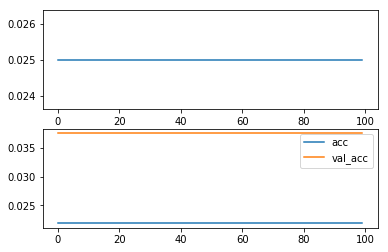

In [154]:
plt.subplot(211)
plt.plot(hist.history['loss'])

plt.subplot(212)
plt.plot(hist.history['acc'], label='acc')
plt.plot(hist.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

- back하면서 그래디언트 -> 미니배치만큼 시행
- RGB 3장겹쳐서(원래 세 장 따로)
- 필터 5*5: *3은 input채널 갯수
---
layer1
- weights 필터 16개: 눈꼽(5*5) 3개있는데 겹쳐놓았음(RGB)
- Activation: 1:1 대응 됨
- Activation 함수 통과(relu: 양수만 통과시킴) - 흰색 반점이 대응하는 feature있는 위치
    - feature map이 이미지 역할
- pool
- layer 하나
---
layer2
- 필터 20개인데`()`, 하나 셋트`()`안에 16개
- 통과해서 합치면 Activation 하나
- 활성화 통과시키면 하얀색
- pool
---
- 마지막 파이 320개를 마지막 10개에 출력 -> softmax통과하면 scaling: 흰색이 내가 고른 답

backpropagation
- Activation Gradient: delta

In [ ]:
채널 통과 3 - 16셋트 - 이미지 패턴 20셋트:채널 20개 - ... - 마지막은 class 10종류

In [ ]:
from keras.application